# PASA TP1
## Periodogram test
## TODO
* Zero padding
* Chequear endpoint en linspace de periodograma
* Importante: cuando hago periodograma por ac uso 2N-1 muestras para enviar a fft, en cambio cuando parto de la señal solo tengo N muestras
* Ojo que en scipy me da escalado, mucho menos potente

In [1]:
from scipy.fft import fft, ifft, fftfreq, rfft
import scipy.signal as sps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# *****************************************************************
# BIASED_AUTOCORRELATION
# Computes the biased estimator for autocorrelation for a given sampled signal
# *****************************************************************
def biased_autocorrelation(signal):
    N = signal.shape[0]
    #print(f'-----N is {N}-----')
    ac_est = np.zeros(2*N-1) # tamaño 119 (0 a 118)
    x = np.arange(-(N-1), N, 1)
    for l in range(N): # l va de 0 a 59
        #print(f'****now l is {l}****')
        #print(f'positive-index is {N-l-1}')
        #print(f'negative-index is {N+l-1}')
        for n in range(0, N-l):
            ac_est[N+l-1] += signal[n+l]*np.conjugate(signal[n])    
        ac_est[N-l-1] = np.conjugate(ac_est[N+l-1])
            
    ac_est /= N
    return x, ac_est            

In [3]:
# *****************************************************************
# PERIODOGRAM
# Computes periodogram psd estimation for a given sampled signal
# *****************************************************************

def periodogram(signal, use_autocorrelation=False):
    N = signal.shape[0]
    #x = np.linspace(0,N*sample_period, endpoint=False)
    
    if use_autocorrelation == True:
        # Autocorrelation method
        #_, ac = biased_autocorrelation(signal) # ac is 2N-1 while signal is N
        ac = np.correlate(signal, signal, mode='full') / N
        per = np.absolute(fft(ac))
        #xf = fftfreq(2*N-1, 1.0) # not same bins, more points here and same sample period.
        xf = np.arange(len(per)) / len(per)
    
    else:
        # By definition
        # First, compute the signal FFT
        # Adding zero-padding to enhance frequency resolution
        yf = fft(np.pad(signal, (N//2,N//2)))
        xf = np.arange(len(yf)) / len(yf)
        
        # Calculate periodogram by powering amplitude spectrum modulus by 2 and dividing by N
        per = (np.abs(yf)**2) / N
        
    # Returning positive freq spectrum only
    return xf[xf < 0.5], per[xf < 0.5]       

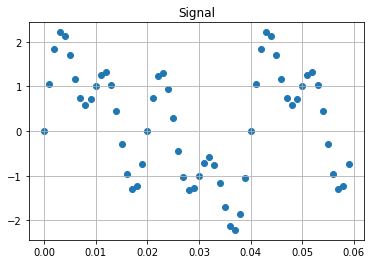

Wall time: 241 ms


In [4]:
%%time
samplefreq = 1000 # Hz
sinfreq = 50 # Hz

# Generate 3 periods of sinusoidal sample signal
x = np.arange(0,3/sinfreq, 1/samplefreq)
y = np.sin(2*np.pi*sinfreq*x) + np.sin(np.pi*sinfreq*x) + np.sin(4*np.pi*sinfreq*x)
# Plot signal
plt.scatter(x,y)
plt.title('Signal')
plt.grid()
plt.show()

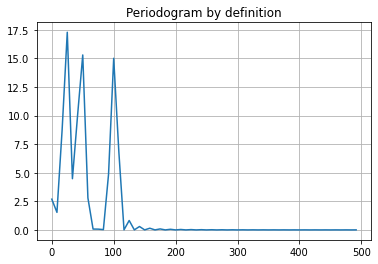

Wall time: 274 ms


In [5]:
%%time
def_xf, def_yf = periodogram(y, use_autocorrelation=False)
plt.plot(def_xf*samplefreq, def_yf)
plt.title('Periodogram by definition')
plt.grid()
plt.show()

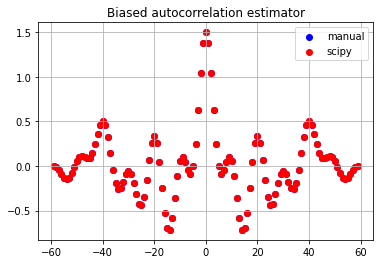

Wall time: 271 ms


In [6]:
%%time
taps, ya = biased_autocorrelation(y)
ya_np = np.correlate(y,y,mode='full') / y.shape[0]
plt.scatter(taps, ya, color='blue', label='manual')
plt.scatter(taps, ya_np, color='red', label='scipy')
plt.title('Biased autocorrelation estimator')
plt.legend()
plt.grid()
plt.show()

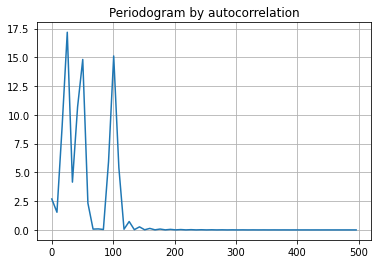

Wall time: 288 ms


In [7]:
%%time
ac_xf, ac_yf = periodogram(y, use_autocorrelation=True)
plt.plot(ac_xf*samplefreq, ac_yf)
plt.title('Periodogram by autocorrelation')
plt.grid()
plt.show()

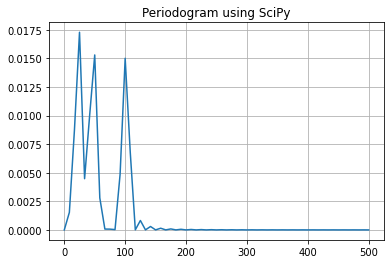

Wall time: 223 ms


In [8]:
%%time
sps_xf, sps_yf = sps.periodogram(np.pad(y, (y.shape[0]//2,y.shape[0]//2)), samplefreq, window='boxcar', scaling='density')
plt.plot(sps_xf, sps_yf)
plt.title('Periodogram using SciPy')
plt.grid()
plt.show()

## Comparing both methods

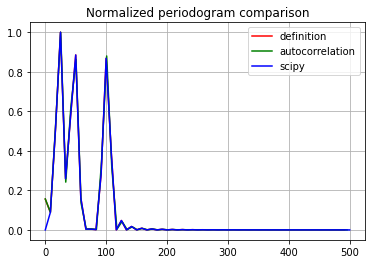

Wall time: 235 ms


In [9]:
%%time
plt.plot(def_xf*samplefreq, def_yf/max(def_yf), color='red', label='definition')
plt.plot(ac_xf*samplefreq, ac_yf/max(ac_yf), color='green', label='autocorrelation')
plt.plot(sps_xf, sps_yf/max(sps_yf), color='blue', label='scipy')
plt.legend()
plt.title('Normalized periodogram comparison')
plt.grid()
plt.show()

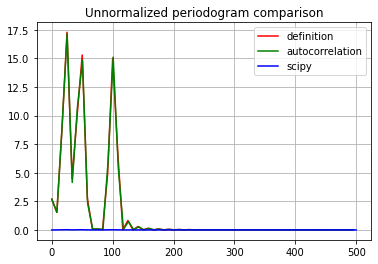

Wall time: 739 ms


In [10]:
%%time
plt.plot(def_xf*samplefreq, def_yf, color='red', label='definition')
plt.plot(ac_xf*samplefreq, ac_yf, color='green', label='autocorrelation')
plt.plot(sps_xf, sps_yf, color='blue', label='scipy')
plt.legend()
plt.title('Unnormalized periodogram comparison')
plt.grid()
plt.show()

In [11]:
def periodogram_manual(dataset, color_plot, fs):
  FFTk = abs(np.fft.rfft(dataset))**2 / len(dataset)
  freq_axis = np.fft.rfftfreq(len(dataset), d=1/fs)   # Each k-th FFT output is asociated with w(k) = 2*pi*k/len(dataset)
  plt.plot(freq_axis, FFTk)
  plt.xlabel('Hz')
  plt.grid(True, which="both")

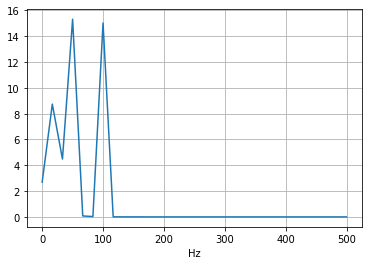

In [12]:
periodogram_manual(y, 'red', samplefreq)